In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget http://cb.lk/covid_19

--2022-08-29 12:51:55--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-08-29 12:51:55--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-08-29 12:51:55--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-08

In [ ]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
replace CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdb

# Load Datasets

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

# **Importing Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# **Building Architecture**


In [ ]:
conv_base = tf.keras.applications.xception.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(150,150,3))

In [ ]:
from keras import models

In [ ]:
from keras import layers

In [ ]:
model = models.Sequential()
model.add(conv_base)
conv_base.trainable = False

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(150,150,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
#model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#model.add(Conv2D(112,(3,3),activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(224,(3,3),activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss='categorical_crossentropy',optimizer = "adam",metrics=["accuracy"])
model.save('CovidXception.model')

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 conv2d_31 (Conv2D)          (None, 3, 3, 32)          589856    
                                                                 
 conv2d_32 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 dropout_14 (Dropout)        (None, 1, 1, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_15 (Dropout)        (None, 64)              

# **Train From Scratch**

## *Data Augmentation*

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


# **Fit The Model**

In [ ]:
pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
filepath = '/content/'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= filepath, 
                                                         save_weights_only=True, save_best_only=True)

In [ ]:
hist =model.fit(train_generator,steps_per_epoch = 7,epochs = 10,validation_data = validation_generator,validation_steps = 2, callbacks= [checkpoint_callback])

Epoch 1/10
7/7 [==============================] - 28s 3s/step - loss: 0.0000e+00 - accuracy: 0.5134 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 18s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 19s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 21s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 18s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 19s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 19s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 -

## *Loss is very less and accuracy is on point*

In [ ]:
model.save("Detection_Covid_19.h5")

In [ ]:
model.evaluate(train_generator)

7/7 [==============================] - 15s 2s/step - loss: 0.0000e+00 - accuracy: 0.5000


[0.0, 0.5]

In [ ]:
model.evaluate(validation_generator)

2/2 [==============================] - 4s 1s/step - loss: 0.0000e+00 - accuracy: 0.5000


[0.0, 0.5]

# **Test Images**

In [ ]:
model = load_model("Detection_Covid_19.h5")

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# **List all data in history**

In [ ]:

history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Summarize history for accuracy**

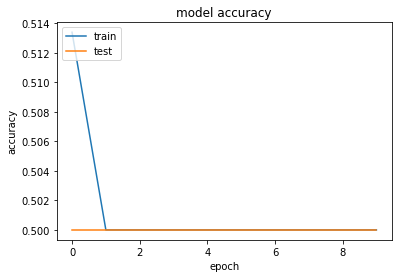

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# **Summarize history for loss**

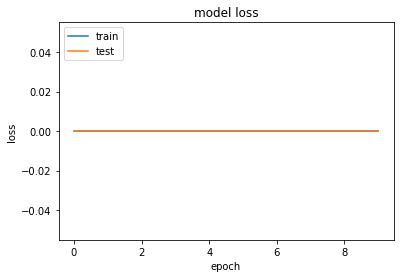

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Predictions from X-Ray Images**

This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


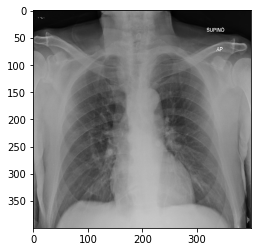

In [ ]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('/content/CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg', target_size = (150, 150))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results=model.predict(xtest_image)
#results = model.predict_classes(xtest_image)
# training_set.class_indices
imggg = cv2.imread('/content/CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

This Xray Image is of Negative covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


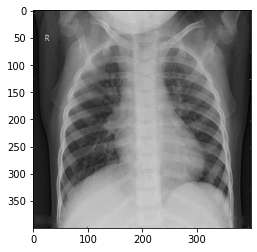

In [ ]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('/content/CovidDataset/Val/Normal/NORMAL2-IM-0765-0001.jpeg', target_size = (150, 150))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results=model.predict(xtest_image)
#results = model.predict_classes(xtest_image)
# training_set.class_indices

imggg = cv2.imread('/content/CovidDataset/Val/Normal/NORMAL2-IM-0765-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)